## Import Packages

In [1]:
import itertools
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmaps
from matplotlib.collections import PolyCollection
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.patch import geos_to_path

## Read Data

In [2]:
q_vertical   = xr.open_dataset("q_vertical.nc")
q_horizontal = xr.open_dataset("q_horizontal.nc")

In [3]:
q_vertical

<xarray.Dataset> Size: 3kB
Dimensions:  (level: 6, lat: 120)
Coordinates:
  * level    (level) int64 48B 1000 925 850 700 500 250
  * lat      (lat) float32 480B -29.75 -29.25 -28.75 ... 28.75 29.25 29.75
Data variables:
    q        (level, lat) float32 3kB ...
Attributes:
    description:  Teporal and zonal mean of specific humidity in 2011

In [4]:
q_horizontal

<xarray.Dataset> Size: 109kB
Dimensions:  (lat: 120, lon: 224)
Coordinates:
  * lat      (lat) float32 480B -29.75 -29.25 -28.75 ... 28.75 29.25 29.75
  * lon      (lon) float32 896B 40.31 40.94 41.56 42.19 ... 178.4 179.1 179.7
Data variables:
    q        (lat, lon) float32 108kB ...
Attributes:
    description:  Teporal and mean of specific humidity at 850 hPa in 2011

## Plot

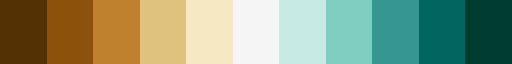

In [5]:
# ncl colormap
cmaps.CBR_drywet

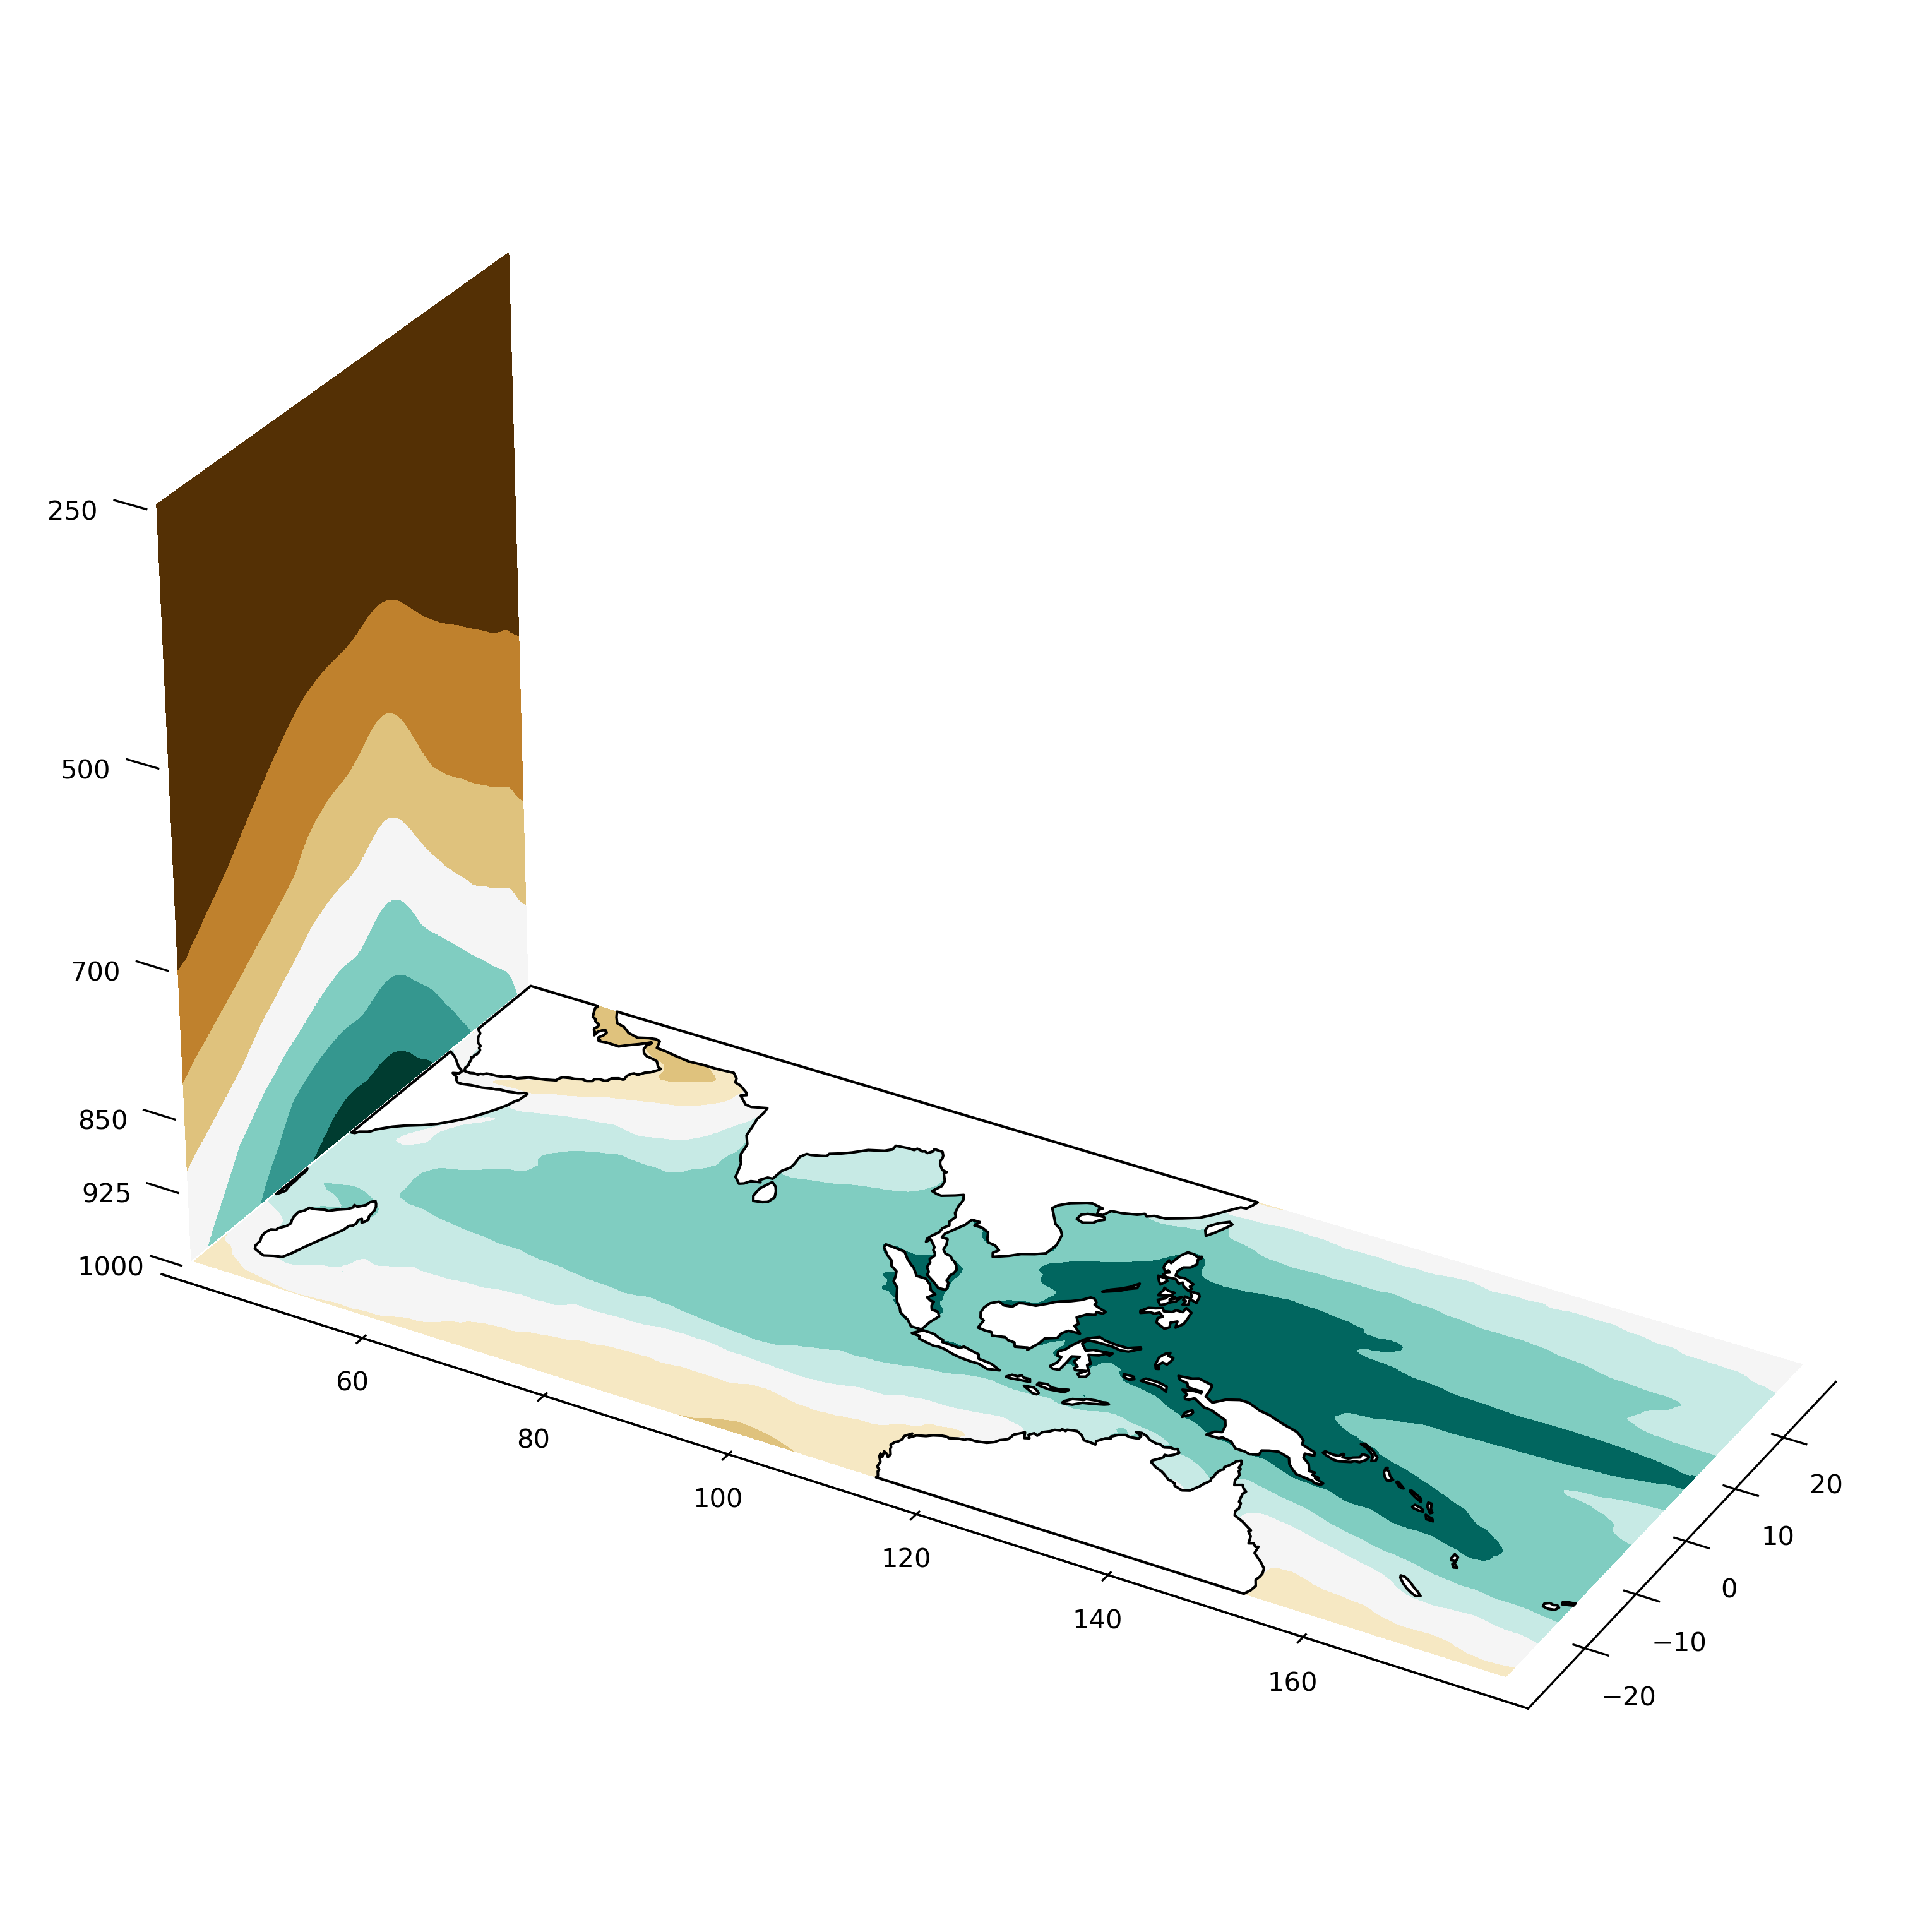

In [6]:
# figure
fig = plt.figure(figsize=(10, 10), dpi = 300)
ax3d = fig.add_axes([0, 0, 1, 1], projection='3d', computed_zorder = False)

# plot variables in 3D
proj_ax = plt.figure().add_axes([0, 0, 1, 1], projection = ccrs.PlateCarree())
cs = proj_ax.contourf(q_horizontal.lon, q_horizontal.lat, q_horizontal.q * 1e3,
                      cmap = "CBR_drywet", levels = np.linspace(0, 15, 10), extend = "both", transform=ccrs.PlateCarree()) # axes that is used as an "anchor" for the 3D plot
ax3d.contourf(q_horizontal.lon, q_horizontal.lat, q_horizontal.q * 1e3,
              zdir = "z", offset = 1000, cmap = "CBR_drywet", levels = np.linspace(0, 15, 10), extend = "both")
ax3d.contourf(q_vertical.q, q_vertical.lat, q_vertical.level, cmap = "CBR_drywet", zdir = "x", offset = 40)

# set the domain
ax3d.set_xlim(*proj_ax.get_xlim())
ax3d.set_ylim(*proj_ax.get_ylim())
ax3d.set_zlim(1000, 250)

# add coastlines
# ================================ Following code is adapted from the answer by Phil Elson on stack overflow ================================ #
concat   = lambda iterable: list(itertools.chain.from_iterable(iterable)) # self-defined function to flatten the list
target_projection = proj_ax.projection
feature  = cfeature.NaturalEarthFeature("physical", "land", "110m")
geoms    = feature.geometries()

boundary = proj_ax._get_extent_geom() # get the projection boundary
geoms = [target_projection.project_geometry(geom, feature.crs) for geom in geoms] # project the geometries to the target projection
geoms = [boundary.intersection(geom) for geom in geoms] # the geometries within the boundary

paths = concat(geos_to_path(geom) for geom in geoms) # convert the geometries to paths
polys = concat(path.to_polygons() for path in paths) # convert the paths to polygons
lc    = PolyCollection(polys, edgecolor = "black", facecolor = "w", closed = True)
ax3d.add_collection3d(lc, zs = ax3d.get_zlim()[0]) # add the polygons to the 3D plot
# =========================================================================================================================================== #

# other settings
ax3d.zaxis._axinfo["juggled"] = (1, 0, 2)
ax3d.set_aspect("equalxy")
ax3d.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3d.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3d.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3d.set_zticks([1000, 925, 850, 700, 500, 250])
ax3d.grid(False)
ax3d.view_init(30, -60)
plt.close(proj_ax.figure)

## Acknowledgment

The code of drawing coastlines on Axes3D is adapted from the hacking answer by Phil Elson on [stack overflow](https://stackoverflow.com/questions/23785408/3d-cartopy-similar-to-matplotlib-basemap)

Phil's github: https://github.com/pelson